In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

In [2]:
!pip install rarfile

In [3]:
import os
import pandas as pd
import gdown
import rarfile
import shutil
from PIL import Image
# Download the RAR file
url = 'https://drive.google.com/uc?id=1740zVxT_njc6HgWjaIuSfzQKSTua4472'
output_rar = '/content/VegetablesDataset.rar'
gdown.download(url, output_rar, quiet=False)
# Extract the RAR file
with rarfile.RarFile(output_rar, 'r') as rar_ref:
    rar_ref.extractall('/content')

Downloading...
From (original): https://drive.google.com/uc?id=1740zVxT_njc6HgWjaIuSfzQKSTua4472
From (redirected): https://drive.google.com/uc?id=1740zVxT_njc6HgWjaIuSfzQKSTua4472&confirm=t&uuid=1da3c115-02ee-41ae-bf7d-aa5f3b0d8a34
To: /content/VegetablesDataset.rar
100%|██████████| 253M/253M [00:06<00:00, 37.6MB/s]


In [4]:
# Path to the extracted dataset folder

dataset_Tomato = '/content/VegetableDatasets/Tomato'

## **Tomato**

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 224, 224, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 224, 224, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)         0         ['block1_conv2[0][0]']        
                                                                                              

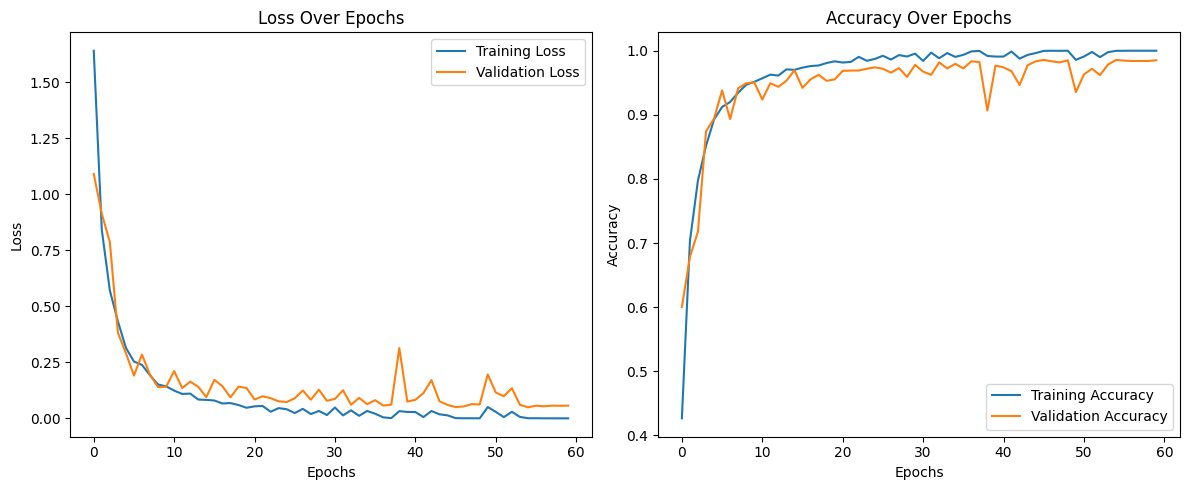

114/114 [==============================] - 19s 162ms/step

Performance on Test Data
Precision: 0.9870638450618662
Recall: 0.987091458390552
F1 Score: 0.9870454682855498
Accuracy: 0.987091458390552
Confusion Matrix:
                                       Bacterial_spot  Early_blight  Healthy  \
Bacterial_spot                                   422             0        0   
Early_blight                                       5           186        0   
Healthy                                            0             0      318   
Late_blight                                        0             5        0   
Leaf_Mold                                          0             0        0   
Mosaic_virus                                       0             0        0   
Septoria_leaf_spot                                 0             0        0   
Spider_mites Two-spotted_spider_mite               0             0        0   
Target_Spot                                        1             1       

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add, GlobalAveragePooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Directory for the dataset
data_dir = dataset_Tomato

# Define the CNN architecture



# Define the CNN architecture
input_shape = (224, 224, 3)
num_classes = 10
# Input
inputs = layers.Input(shape=input_shape)


# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(inputs)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4 Inception
# Inception module1 ######################################################################################################

inception1_3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

inception1_5 = Conv2D(64, (5, 5), activation='relu', padding='same')(x)


inception1_7 = Conv2D(64, (7, 7), activation='relu', padding='same')(x)

inc1_3_r2= Conv2D(64, (3, 3), dilation_rate=2, activation='relu', padding='same')(x)

inc1_3_r3= Conv2D(64, (3, 3), dilation_rate=3, activation='relu', padding='same')(x)

inception1_MP= MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
inception1_MP = Conv2D(128, (1, 1), activation='relu')(inception1_MP)
Inception_Block1_output = layers.Concatenate()([inception1_MP, inception1_3, inception1_5,inception1_7,inc1_3_r2,inc1_3_r3])
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(Inception_Block1_output)

# Block 5 Inception
# Inception module1 ######################################################################################################


inception1_3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

inception1_5 = Conv2D(64, (5, 5), activation='relu', padding='same')(x)


inception1_7 = Conv2D(64, (7, 7), activation='relu', padding='same')(x)

inc1_3_r2= Conv2D(64, (3, 3), dilation_rate=2, activation='relu', padding='same')(x)

inc1_3_r3= Conv2D(64, (3, 3), dilation_rate=3, activation='relu', padding='same')(x)

inception1_MP= MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
inception1_MP = Conv2D(128, (1, 1), activation='relu')(inception1_MP)

Inception_Block2_output = layers.Concatenate()([ inception1_3, inception1_5,inception1_7,inc1_3_r2,inc1_3_r3,inception1_MP])
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(Inception_Block2_output)

# Global Average Pooling (GAP)
global_avg_pool = layers.GlobalAveragePooling2D()(x)

# Fully Connected Layer
outputs = layers.Dense(num_classes, activation='softmax')(global_avg_pool)
# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'Train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, 'Validation'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'Test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Training the model
history = model.fit(train_generator, epochs=60, validation_data=val_generator)

# Plot training results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Helper function to evaluate the model on given test generator
def evaluate_model(test_generator, model, classes, title="Performance"):
    y_test_pred = model.predict(test_generator)
    y_test_pred = np.argmax(y_test_pred, axis=1)

    precision = precision_score(test_generator.labels, y_test_pred, average='weighted')
    recall = recall_score(test_generator.labels, y_test_pred, average='weighted')
    f1 = f1_score(test_generator.labels, y_test_pred, average='weighted')
    accuracy = accuracy_score(test_generator.labels, y_test_pred)

    print(f"\n{title}")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)

    # Display the confusion matrix
    confusion = confusion_matrix(test_generator.labels, y_test_pred)
    confusion_df = pd.DataFrame(confusion, index=classes, columns=classes)
    print("Confusion Matrix:\n", confusion_df)

# Test the model on the test set
evaluate_model(test_generator, model, ['Bacterial_spot', 'Early_blight', 'Healthy', 'Late_blight','Leaf_Mold', 'Mosaic_virus', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus'], title="Performance on Test Data")


In [6]:
model.save_weights('/content/Tomato_Multiscale_VGG16_weights.h5')

1/1 [==============================] - 2s 2s/step


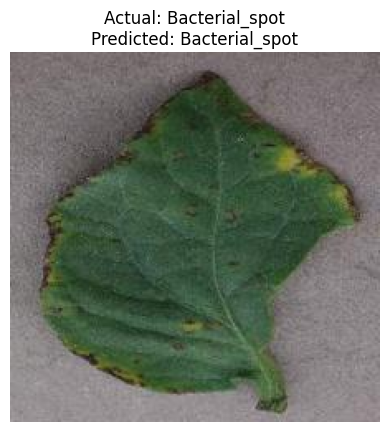

1/1 [==============================] - 0s 76ms/step


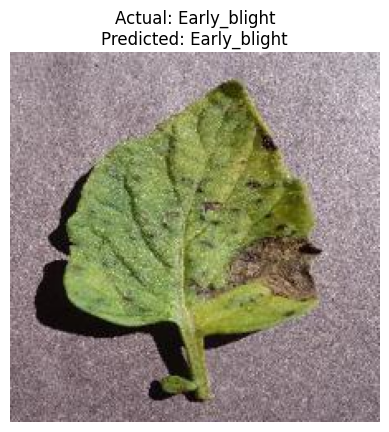

1/1 [==============================] - 0s 58ms/step


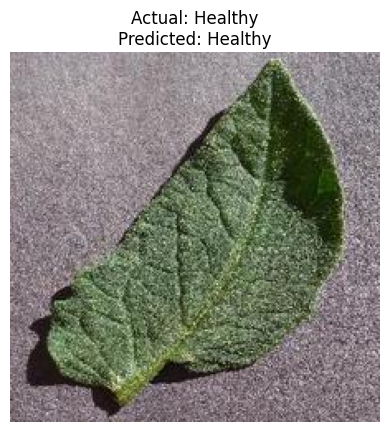

1/1 [==============================] - 0s 30ms/step


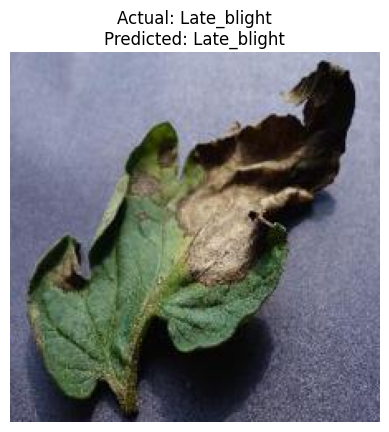

1/1 [==============================] - 0s 74ms/step


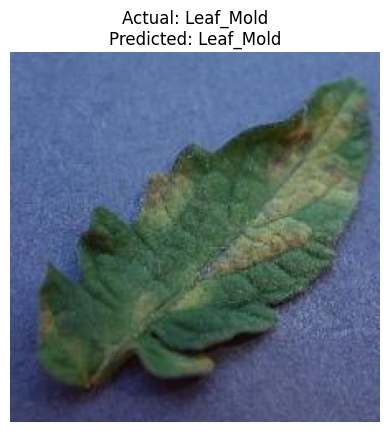

1/1 [==============================] - 0s 30ms/step


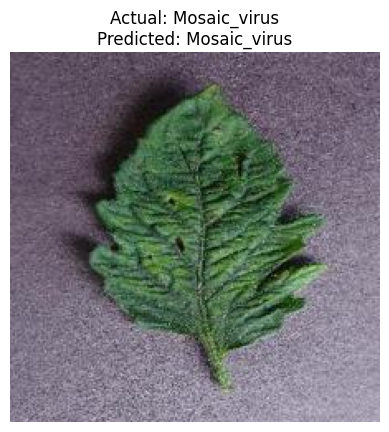

1/1 [==============================] - 0s 32ms/step


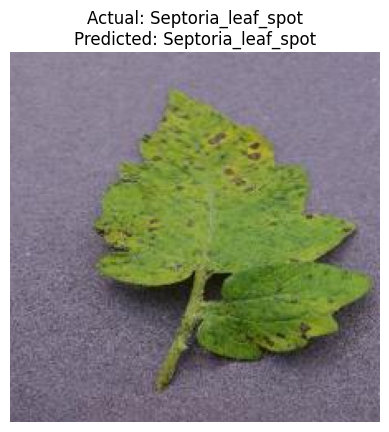

1/1 [==============================] - 0s 61ms/step


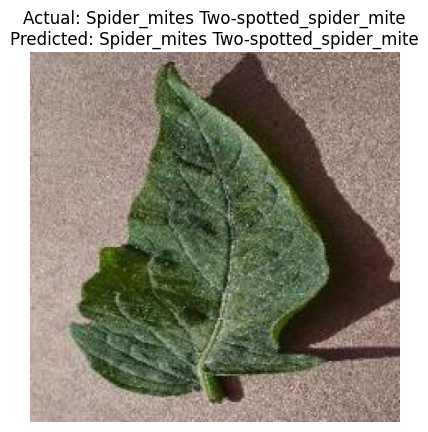

1/1 [==============================] - 0s 71ms/step


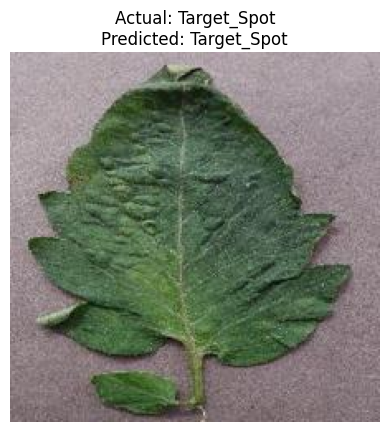

1/1 [==============================] - 0s 50ms/step


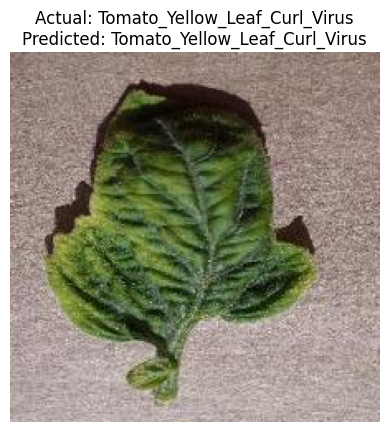

In [7]:
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your trained model
model.load_weights('/content/Tomato_Multiscale_VGG16_weights.h5')
# Path to the test directory
test_dir = '/content/VegetableDatasets/Tomato/Test'

# List of class names (subfolder names)
class_names = [
    'Bacterial_spot', 'Early_blight', 'Healthy', 'Late_blight', 'Leaf_Mold',
    'Mosaic_virus', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite',
    'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus'
]

# Function to load and preprocess an image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Function to display image with actual and predicted labels
def display_image(img_path, actual_label, predicted_label):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Iterate through each class
for class_name in class_names:
    class_dir = os.path.join(test_dir, class_name)
    # Get a random image from the class directory
    img_name = random.choice(os.listdir(class_dir))
    img_path = os.path.join(class_dir, img_name)

    # Preprocess the image
    img_array = load_and_preprocess_image(img_path)

    # Predict the class of the image
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]

    # Display the image with actual and predicted labels
    display_image(img_path, class_name, predicted_class)


1/1 [==============================] - 0s 24ms/step


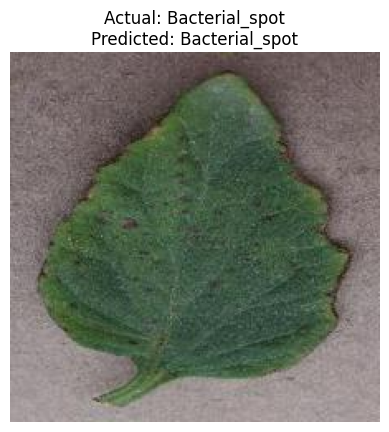

Disease: Bacterial_spot
Causal Agent: Xanthomonas vesicatoria
Favorable Environment: Warm, humid climates, greenhouses
Transmission Method: Water splashes, contaminated tools
Management Strategies: Crop rotation, resistant varieties, copper-based fungicides
1/1 [==============================] - 0s 18ms/step


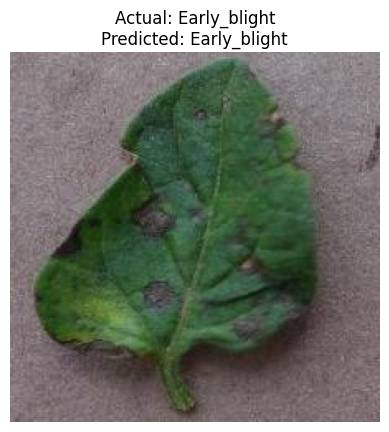

Disease: Early_blight
Causal Agent: Alternaria solani
Favorable Environment: Moist conditions, continuous rain, heavy dew
Transmission Method: Airborne spores, infected plant debris
Management Strategies: Fungicides, crop rotation, resistant varieties
1/1 [==============================] - 0s 20ms/step


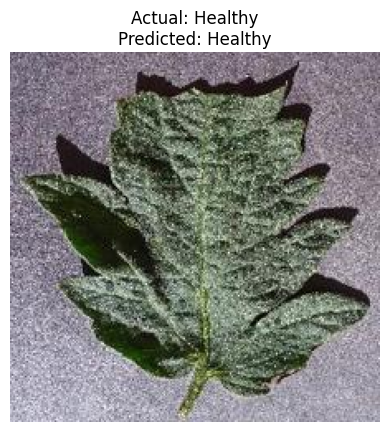

Healthy Plant
1/1 [==============================] - 0s 22ms/step


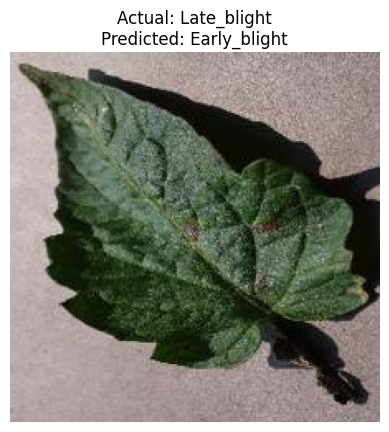

Disease: Early_blight
Causal Agent: Alternaria solani
Favorable Environment: Moist conditions, continuous rain, heavy dew
Transmission Method: Airborne spores, infected plant debris
Management Strategies: Fungicides, crop rotation, resistant varieties
1/1 [==============================] - 0s 19ms/step


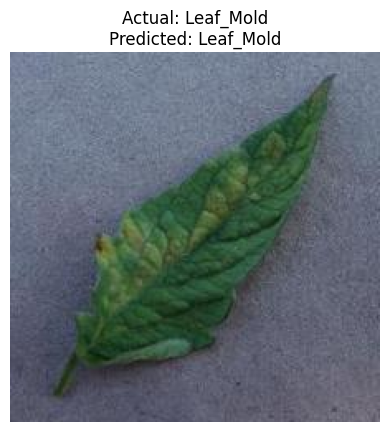

Disease: Leaf_Mold
Causal Agent: Passalora fulva
Favorable Environment: Humid, poorly ventilated environments
Transmission Method: Airborne spores, infected plant debris
Management Strategies: Good ventilation, fungicides, resistant varieties
1/1 [==============================] - 0s 21ms/step


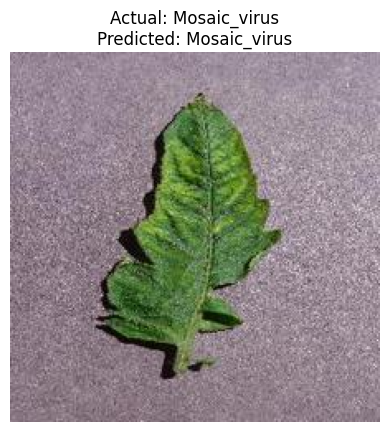

Disease: Mosaic_virus
Causal Agent: Virus
Favorable Environment: High humidity
Transmission Method: Mechanical transmission, contaminated tools, infected plant debris
Management Strategies: Resistant varieties, good field sanitation, removing infected plants
1/1 [==============================] - 0s 20ms/step


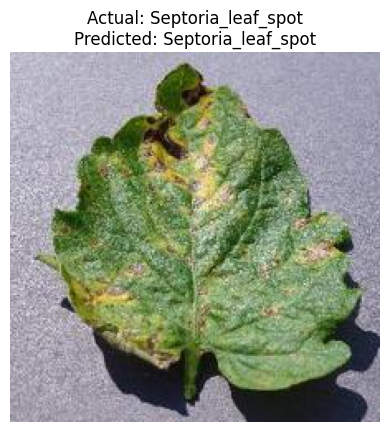

Disease: Septoria_leaf_spot
Causal Agent: Septoria lycopersici
Favorable Environment: Wet, humid conditions
Transmission Method: Splashing water, insects, contaminated tools
Management Strategies: Fungicides, crop rotation, removing infected leaves
1/1 [==============================] - 0s 35ms/step


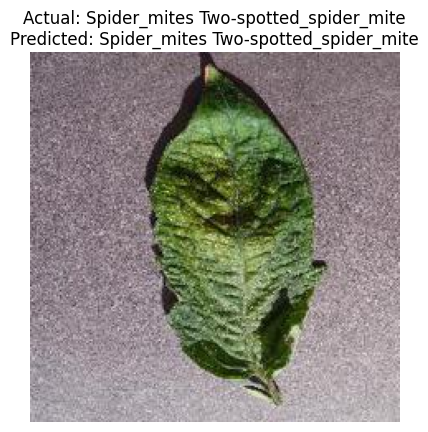

Disease: Spider_mites Two-spotted_spider_mite
Causal Agent: Tetranychus urticae
Favorable Environment: Hot, dry conditions
Transmission Method: Airborne, plant-to-plant
Management Strategies: Miticides, encouraging natural predators (e.g., ladybugs)
1/1 [==============================] - 0s 24ms/step


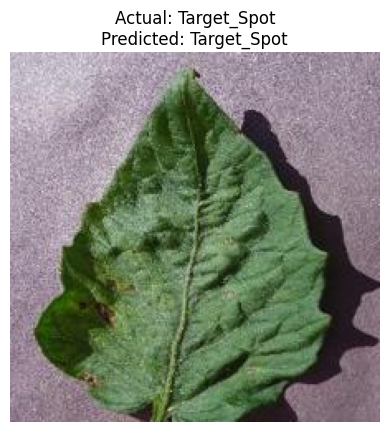

Disease: Target_Spot
Causal Agent: Corynespora cassiicola
Favorable Environment: Warm, year-round climates
Transmission Method: Airborne spores, infected plant debris
Management Strategies: Fungicides, crop rotation, removing infected plant debris
1/1 [==============================] - 0s 23ms/step


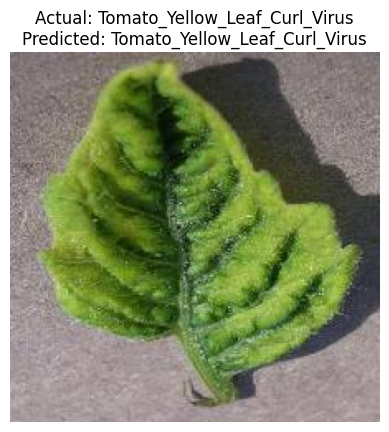

Disease: Tomato_Yellow_Leaf_Curl_Virus
Causal Agent: Whiteflies (vector)
Favorable Environment: Warm conditions
Transmission Method: Whiteflies
Management Strategies: Managing whitefly populations, resistant varieties


In [8]:
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your trained model
model.load_weights('/content/Tomato_Multiscale_VGG16_weights.h5')
# Path to the test directory
test_dir = '/content/VegetableDatasets/Tomato/Test'

# List of class names (subfolder names)
class_names = [
    'Bacterial_spot', 'Early_blight', 'Healthy', 'Late_blight', 'Leaf_Mold',
    'Mosaic_virus', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite',
    'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus'
]

# Disease information dictionary
disease_info = {
    'Bacterial_spot': {
        'Causal Agent': 'Xanthomonas vesicatoria',
        'Favorable Environment': 'Warm, humid climates, greenhouses',
        'Transmission Method': 'Water splashes, contaminated tools',
        'Management Strategies': 'Crop rotation, resistant varieties, copper-based fungicides'
    },
    'Early_blight': {
        'Causal Agent': 'Alternaria solani',
        'Favorable Environment': 'Moist conditions, continuous rain, heavy dew',
        'Transmission Method': 'Airborne spores, infected plant debris',
        'Management Strategies': 'Fungicides, crop rotation, resistant varieties'
    },
    'Late_blight': {
        'Causal Agent': 'Phytophthora infestans',
        'Favorable Environment': 'Cool, damp conditions',
        'Transmission Method': 'Spore-based transmission',
        'Management Strategies': 'Fungicides, resistant varieties, good field sanitation'
    },
    'Leaf_Mold': {
        'Causal Agent': 'Passalora fulva',
        'Favorable Environment': 'Humid, poorly ventilated environments',
        'Transmission Method': 'Airborne spores, infected plant debris',
        'Management Strategies': 'Good ventilation, fungicides, resistant varieties'
    },
    'Septoria_leaf_spot': {
        'Causal Agent': 'Septoria lycopersici',
        'Favorable Environment': 'Wet, humid conditions',
        'Transmission Method': 'Splashing water, insects, contaminated tools',
        'Management Strategies': 'Fungicides, crop rotation, removing infected leaves'
    },
    'Spider_mites Two-spotted_spider_mite': {
        'Causal Agent': 'Tetranychus urticae',
        'Favorable Environment': 'Hot, dry conditions',
        'Transmission Method': 'Airborne, plant-to-plant',
        'Management Strategies': 'Miticides, encouraging natural predators (e.g., ladybugs)'
    },
    'Target_Spot': {
        'Causal Agent': 'Corynespora cassiicola',
        'Favorable Environment': 'Warm, year-round climates',
        'Transmission Method': 'Airborne spores, infected plant debris',
        'Management Strategies': 'Fungicides, crop rotation, removing infected plant debris'
    },
    'Tomato_Yellow_Leaf_Curl_Virus': {
        'Causal Agent': 'Whiteflies (vector)',
        'Favorable Environment': 'Warm conditions',
        'Transmission Method': 'Whiteflies',
        'Management Strategies': 'Managing whitefly populations, resistant varieties'
    },
    'Mosaic_virus': {
        'Causal Agent': 'Virus',
        'Favorable Environment': 'High humidity',
        'Transmission Method': 'Mechanical transmission, contaminated tools, infected plant debris',
        'Management Strategies': 'Resistant varieties, good field sanitation, removing infected plants'
    }
}

# Function to load and preprocess an image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Function to display image with actual and predicted labels
def display_image(img_path, actual_label, predicted_label):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}')
    plt.axis('off')
    plt.show()

    if predicted_label in disease_info:
        info = disease_info[predicted_label]
        print(f"Disease: {predicted_label}")
        print(f"Causal Agent: {info['Causal Agent']}")
        print(f"Favorable Environment: {info['Favorable Environment']}")
        print(f"Transmission Method: {info['Transmission Method']}")
        print(f"Management Strategies: {info['Management Strategies']}")
    else:
        print("Healthy Plant")

# Iterate through each class
for class_name in class_names:
    class_dir = os.path.join(test_dir, class_name)
    # Get a random image from the class directory
    img_name = random.choice(os.listdir(class_dir))
    img_path = os.path.join(class_dir, img_name)

    # Preprocess the image
    img_array = load_and_preprocess_image(img_path)

    # Predict the class of the image
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]

    # Display the image with actual and predicted labels
    display_image(img_path, class_name, predicted_class)
